# Спрос на прокат велосипедов в Сеуле 

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
%matplotlib inline

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Переведем дату в timestamp и извлечем отдельно месяц

In [4]:
# Выделим месяц
import datetime
df['date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['month'] = df['date'].dt.month
df['timestamp'] = df['date'].apply(lambda x: pd.Timestamp(x))
df['timestamp'] = df.timestamp.astype('int64') // 10**9
df = df.drop(['Date'], axis=1)

In [5]:
# Для удобства пользования 
df.columns = df.columns.str.replace(' ', '_')

In [6]:
dabl.clean(df, verbose=2).head()

Detected feature types:
continuous      10
dirty_float      0
low_card_int     2
categorical      1
date             1
free_string      0
useless          2
dtype: int64


,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,date,month,timestamp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,2017-12-01,12,1512086400
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,2017-12-01,12,1512086400
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,2017-12-01,12,1512086400
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,2017-12-01,12,1512086400
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,2017-12-01,12,1512086400


# Предварительно посмотрим как метрики связаны между собой
Например, температура, ветер, количество арнедованных велосипедов и т.д.

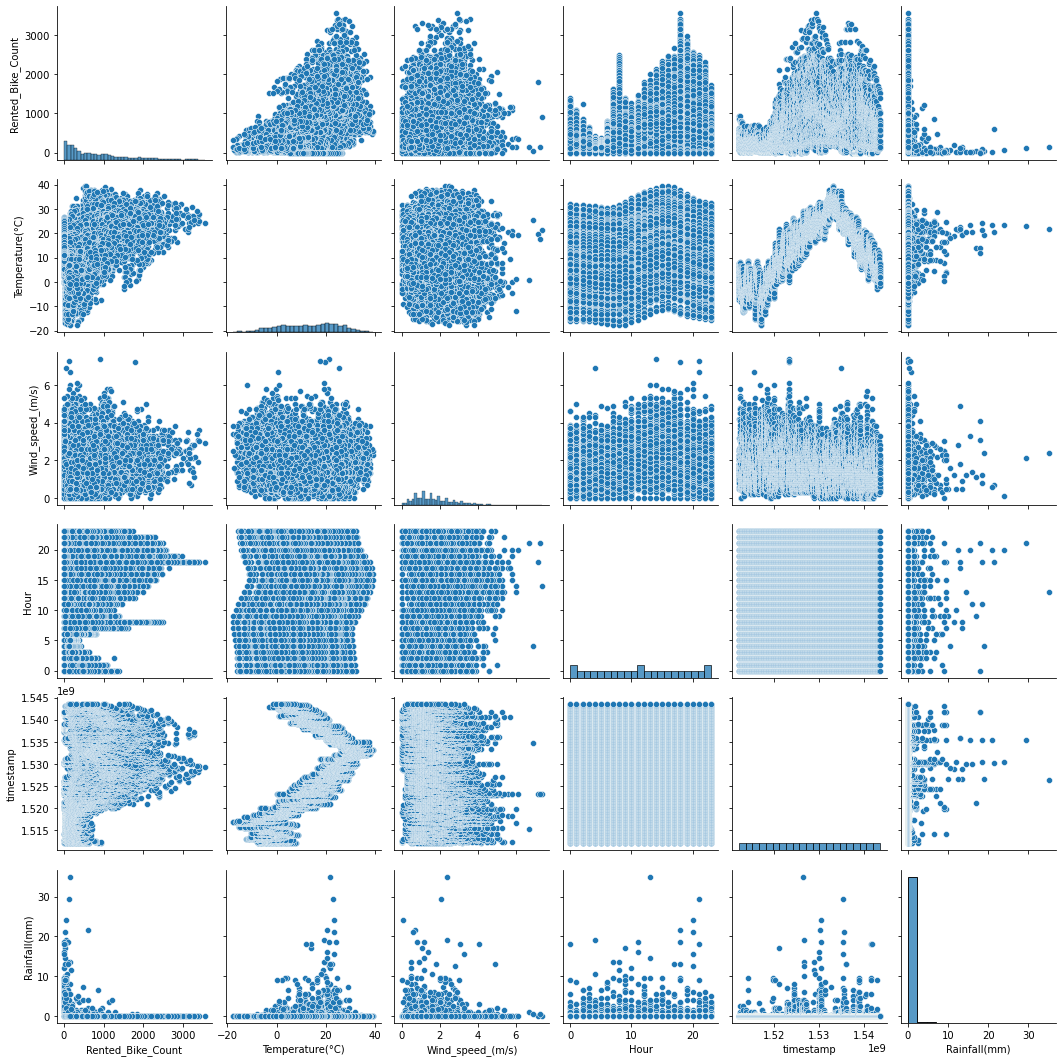

In [7]:
sns.pairplot(df[['Rented_Bike_Count', 'Temperature(°C)', 'Wind_speed_(m/s)', 'Hour', 'timestamp', 'Rainfall(mm)']])

C:\Users\Tim\anaconda3\lib\site-packages\dabl\plot\supervised.py:545: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like regression


C:\Users\Tim\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 26 outliers in column Snowfall_(cm).
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Tim\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 51 outliers in column Rainfall(mm).
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Tim\anaconda3\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 3 outliers in column Wind_speed_(m/s).
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Tim\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\Tim\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


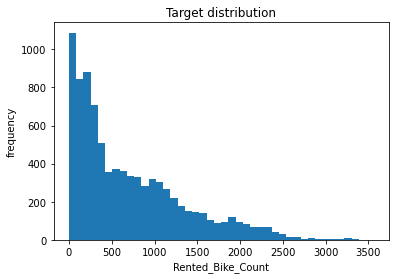

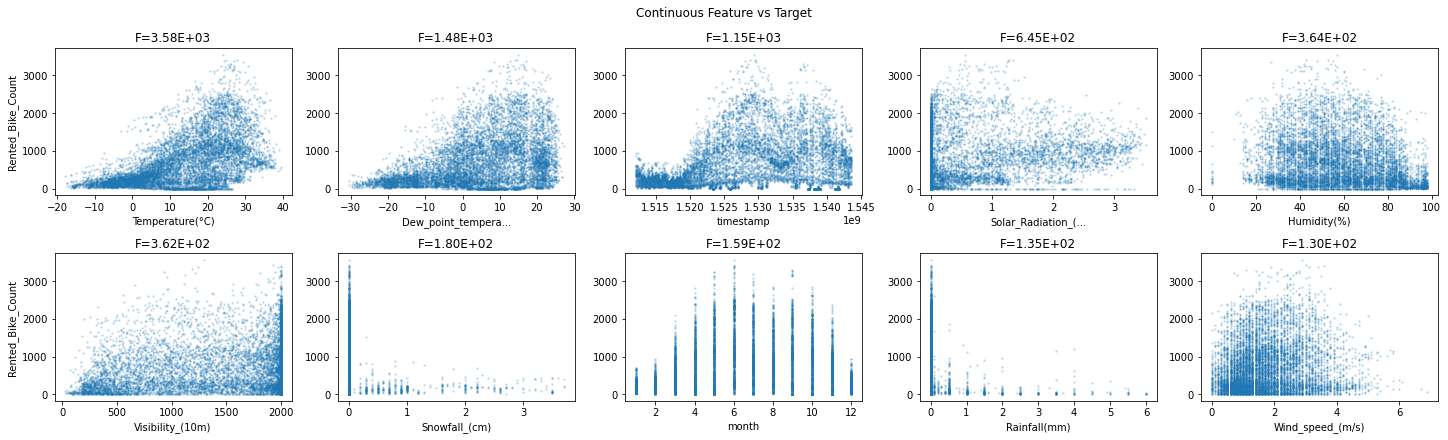

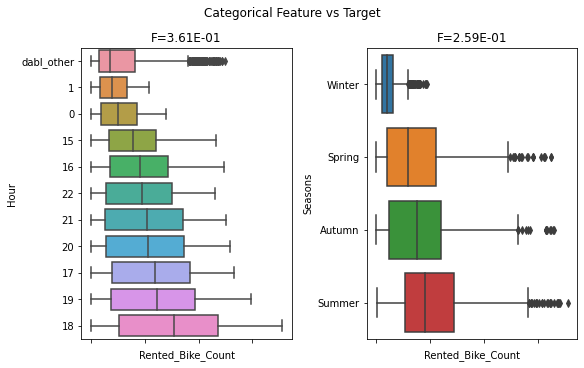

In [8]:
dabl.plot(df, 'Rented_Bike_Count')

Как видно из графиков выше, некоторые метрики не коррелируют с другими и явлются "бесполезными" для анализа. Например: Solar radiation.

In [9]:
df.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,date,month,timestamp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400


# Подробнее рассмотрим каждую метрику, ее распределение

Text(0.5, 1.0, 'Количество арендованных велосипедов')

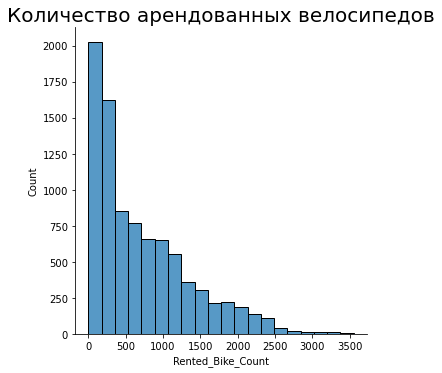

In [10]:
sns.displot(df['Rented_Bike_Count'], kde=False, bins=20)
plt.title('Количество арендованных велосипедов', fontsize=20)

Text(0.5, 6.79999999999999, 'Температура(°C)')

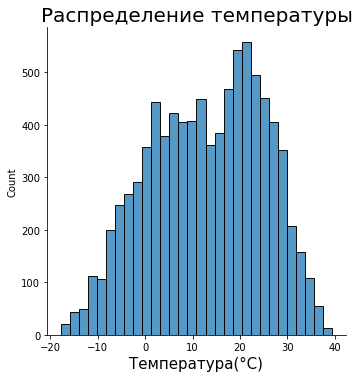

In [11]:
sns.displot(df['Temperature(°C)'], kde=False, bins=30)
plt.title('Распределение температуры', fontsize=20)
plt.xlabel('Температура(°C)', fontsize=15)

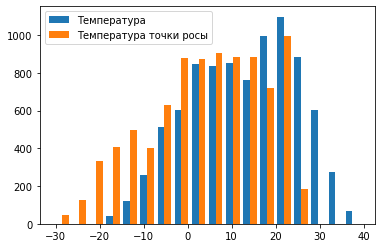

In [12]:
plt.hist([df['Temperature(°C)'], df['Dew_point_temperature(°C)']], bins=18, label=['Температура', 'Температура точки росы'])
plt.legend(loc='upper left')
plt.show()

Text(0.5, 6.79999999999999, 'Влажность(%)')

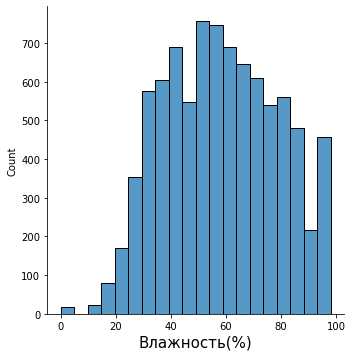

In [13]:
sns.displot(df['Humidity(%)'], kde=False, bins=20)
plt.xlabel('Влажность(%)', fontsize=15)

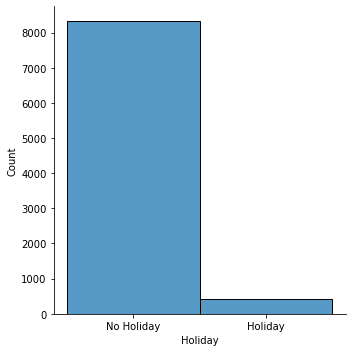

In [14]:
sns.displot(df['Holiday'], kde=False, bins=2)

Как видно в датасете приобладают рабочие дни

Text(0.5, 6.79999999999999, 'Ветер(м/с)')

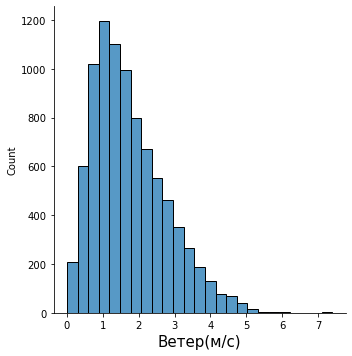

In [15]:
sns.displot(df['Wind_speed_(m/s)'], kde=False, bins=25)
plt.xlabel('Ветер(м/с)', fontsize=15)

Text(0.5, 6.79999999999999, 'Видимость(10м)')

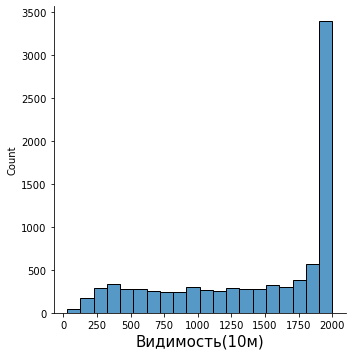

In [16]:
sns.displot(df['Visibility_(10m)'], kde=False, bins=20)
plt.xlabel('Видимость(10м)', fontsize=15)

Text(0.5, 1.0, 'Дождь')

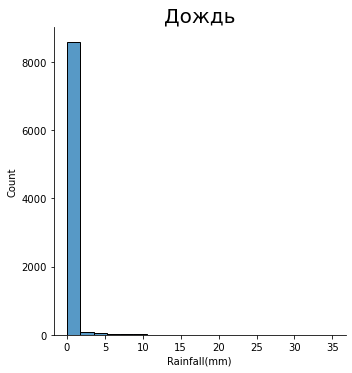

In [17]:
sns.displot(df['Rainfall(mm)'], kde=False, bins=20)
plt.title('Дождь', fontsize=20)

In [18]:
df.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,date,month,timestamp
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01,12,1512086400


# Наибольший интерес вызывает как метрики связаны с количеством арендованных велосипедов("Rented_Bike_Count")

Text(No Holiday, 500, 'No Holiday = Рабочий;Holiday = Рабочий')

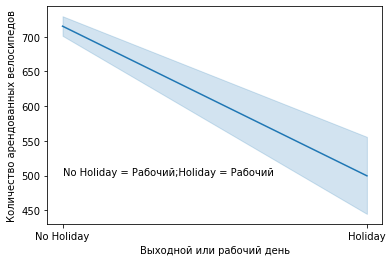

In [19]:
sns.lineplot(x=df.Holiday, y=df.Rented_Bike_Count)
plt.xlabel('Выходной или рабочий день')
plt.ylabel('Количество арендованных велосипедов')
plt.text('No Holiday', 500, r'No Holiday = Рабочий;Holiday = Рабочий')

Видно, что большинство предпочитает арендовать велосипеды в рабочие дни

Text(0.5, 1.0, 'Аренда велосипедов по часам')

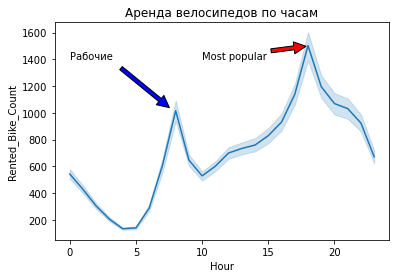

In [31]:
sns.lineplot(x=df.Hour, y=df.Rented_Bike_Count)
plt.annotate('Most popular', xy=(18, 1500), xytext=(10, 1400),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )
plt.annotate('Рабочие', xy=(8, 1000), xytext=(0, 1400),
             arrowprops=dict(facecolor='blue', shrink=0.1),
             )
plt.title('Аренда велосипедов по часам')

* Как видно из графика выше, наиболее популярное время для аренды велосипедов пришлось на 18 часов вечера
* Также видно, что в 8 утра есть скачок по аренде, возможно в это время велосипеды арендуют чтобы добраться на работу

# Выяснилось, что чаще всего велосипеды арендуют:
* в рабочие дни,
* в промежуток с 16 до 22 часов, а также в 8 утра

Теперь разберемся в какое время года и месяц аренда велосипедов наиболее актуальна

<AxesSubplot:xlabel='date', ylabel='Rented_Bike_Count'>

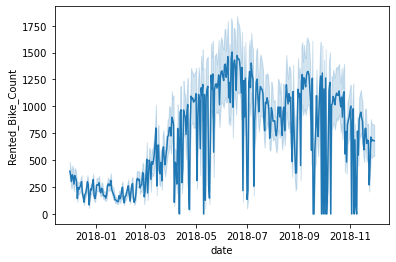

In [21]:
sns.lineplot(x=df.date, y=df.Rented_Bike_Count)

<AxesSubplot:xlabel='Seasons', ylabel='Rented_Bike_Count'>

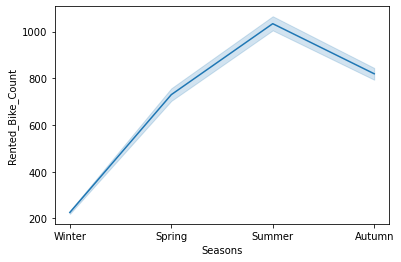

In [22]:
sns.lineplot(x=df.Seasons, y=df.Rented_Bike_Count)

Из графиков выше видно, что больше всего велосипед берут в прокат летом

Посмотрим теперь в какой именно месяц прокат наиболее популярен, а также как температура влияет на на прокат

Text(1, 1200, 'Пик прокатов')

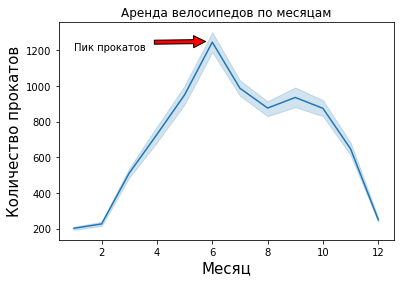

In [23]:
sns.lineplot(x=df['month'], y =df['Rented_Bike_Count'])
plt.title('Аренда велосипедов по месяцам')
plt.xlabel('Месяц', fontsize=15)
plt.ylabel('Количество прокатов', fontsize=15)
plt.annotate('Пик прокатов', xy=(6, 1250), xytext=(1, 1200),
             arrowprops=dict(facecolor='red', shrink=0.1),
             )

Делаем выводы, что в июне было больше всего прокатов велосипедов

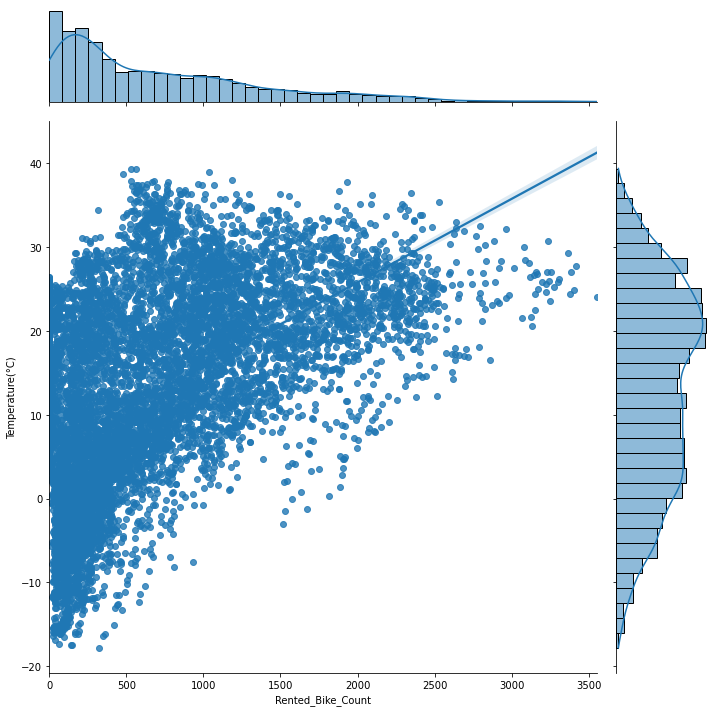

In [24]:
sns.jointplot(x='Rented_Bike_Count', y='Temperature(°C)', data=df, kind='reg', height=10)

Видно, что температура определенно влияет на количество прокатов

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Temperature(°C)'>

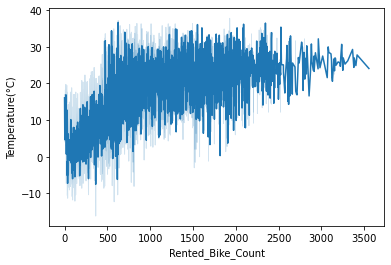

In [25]:
sns.lineplot(x=df['Rented_Bike_Count'], y=df['Temperature(°C)'])

In [26]:
fp1 = df.pivot_table(columns='month', values='Rented_Bike_Count')
fp2 = df.pivot_table(columns='month', values='Temperature(°C)')

<AxesSubplot:xlabel='month'>

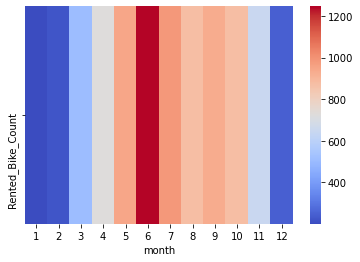

In [27]:
sns.heatmap(fp1, cmap='coolwarm')

<AxesSubplot:xlabel='month'>

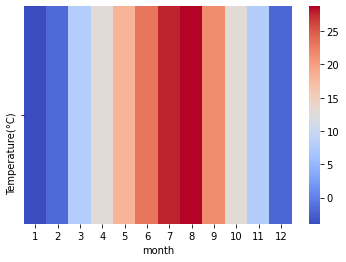

In [28]:
sns.heatmap(fp2, cmap='coolwarm')

In [29]:
june = df.query("month==6")
june.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed_(m/s),Visibility_(10m),Dew_point_temperature(°C),Solar_Radiation_(MJ/m2),Rainfall(mm),Snowfall_(cm),Seasons,Holiday,Functioning_Day,date,month,timestamp
4368,963,0,20.1,63,1.1,1698,12.8,0.0,0.0,0.0,Summer,No Holiday,Yes,2018-06-01,6,1527811200
4369,776,1,19.5,65,0.4,1662,12.7,0.0,0.0,0.0,Summer,No Holiday,Yes,2018-06-01,6,1527811200
4370,554,2,19.0,72,1.4,1258,13.8,0.0,0.0,0.0,Summer,No Holiday,Yes,2018-06-01,6,1527811200
4371,366,3,18.6,72,1.4,1340,13.4,0.0,0.0,0.0,Summer,No Holiday,Yes,2018-06-01,6,1527811200
4372,265,4,18.1,76,1.8,561,13.7,0.0,0.0,0.0,Summer,No Holiday,Yes,2018-06-01,6,1527811200


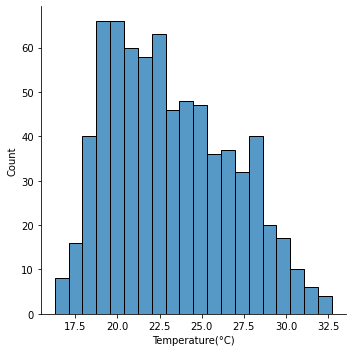

In [30]:
sns.displot(june['Temperature(°C)'], kde=False, bins=20)

Несмотря на то, что самая теплая погода наблюдается в августе и июле, наибольшее число прокатов все равно в июне. Вывод такой, что самая оптимальная погода для проката велосипедов варьируется от 18 до 25 градусов